# Project - Malignant Comments Classification

In this project we have to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying. 

In [1]:
#lets import pandas library to read the CSV data
import pandas as pd
df = pd.read_csv('train.csv')
df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


Here in this dataset we have two csv files train and test. So to build a model using Machine Learning in order to predict the actual value we have to do preprocessing on train dataset and predict using test dataset.

In [2]:
#Check the columns name
df.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB
AxesSubplot(0.125,0.125;0.62x0.755)


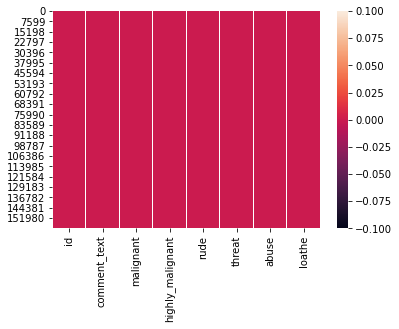

In [3]:
import seaborn as sns             #visualization library to see null values graphically
import matplotlib.pyplot as plt   #another visualization library to plot the output
pd.options.display.max_info_columns = 9   #check the columns info if any null values present
df.info()                              #displays the info
print(sns.heatmap(df.isnull()))

There are no null values in this dataset.

In [4]:
df.describe()   #Calculates the data statistically of all columns

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


From above we can say that all values for each column is different.
There are no more difference in 75% values and max value , so we can say that our data is proper.

# EDA

# Univariate

In this step we have to do the analysis of each column using univariate method. So for this I have used Count method to check the number of unique values present in that particular column and also some visualization libraries to understand our data more clearly.

In [5]:
df['id'].value_counts()   #check the values of each column 

f371040ab200b4f2    1
33a7f6d5581e359a    1
42707095ec67d3e3    1
670e1a220ce3c662    1
1996fb93d6e24f7a    1
                   ..
6d23e5891a288081    1
c0ec4349a2e0f5d2    1
acb1ecdbfb97b16b    1
5b03bac3ca80e276    1
046fa93bebeace3f    1
Name: id, Length: 159571, dtype: int64

In [6]:
df['comment_text'].value_counts()

"NA}}\n}}\n\n Article needs rewriting \nThere are a lot of grammatical errors in this article.  It reads as if the person who wrote it is not fluent in English.  — Preceding unsigned comment added by 68.153.115.152   "                                                                                                                                                                                                                                                               1
"\n\nAs we are apparently at an impasse over this question, I will set aside tomorrow to ask for third party resolution. As to your theory of your ""right"" to suppress these facts, I don't give two cents for your words after that ignorant, preposterous, country bumpkin lie of yours about the BBC broadcasting lies in their story so they can  drum up viewers like Fox news does.\n  "                                                                                         1
Please sign your posts on talk pages per Wikipedia

0    144277
1     15294
Name: malignant, dtype: int64


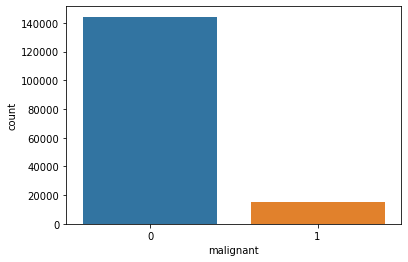

In [7]:
b=df['malignant'].value_counts()
print(b)
sns.countplot(x='malignant',data=df)     #displays the data of each column graphically
plt.show()

0    157976
1      1595
Name: highly_malignant, dtype: int64


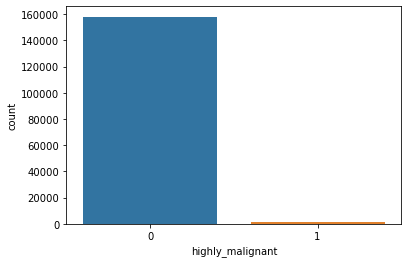

In [8]:
c=df['highly_malignant'].value_counts()
print(c)
sns.countplot(x='highly_malignant',data=df)
plt.show()

0    151122
1      8449
Name: rude, dtype: int64


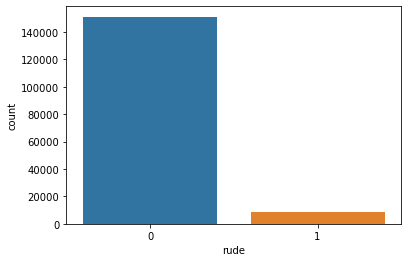

In [9]:
d=df['rude'].value_counts()
print(d)
sns.countplot(x='rude',data=df)
plt.show()

0    159093
1       478
Name: threat, dtype: int64


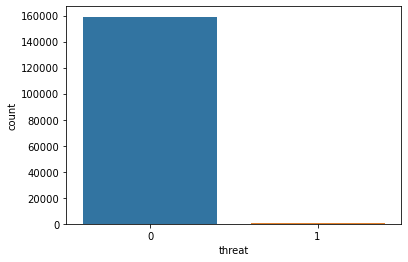

In [10]:
f=df['threat'].value_counts()
print(f)
sns.countplot(x='threat',data=df)
plt.show()

0    151694
1      7877
Name: abuse, dtype: int64


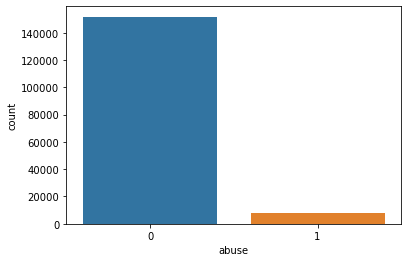

In [11]:
h=df['abuse'].value_counts()
print(h)
sns.countplot(x='abuse',data=df)
plt.show()

0    158166
1      1405
Name: loathe, dtype: int64


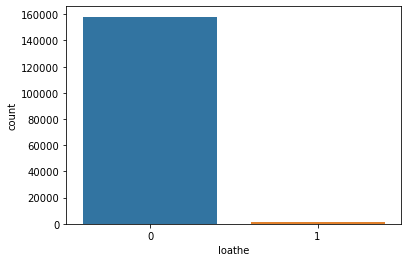

In [12]:
a=df['loathe'].value_counts()
print(a)
sns.countplot(x='loathe',data=df)
plt.show()

# Correlation between columns

In [13]:
df.corr()  #find the pairwise correlation of all columns in the dataframe

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


In [14]:
df.drop(columns=['id'],inplace=True)   #drop the column which is of no use

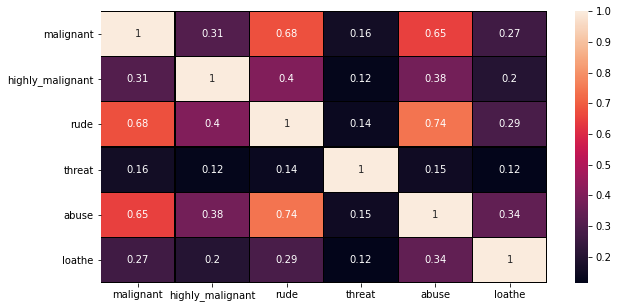

In [15]:
#lets check the correlation using heatmap for better understanding
plt.subplots(figsize=(10,5))
sns.heatmap(df.corr(),linewidths=.1,linecolor='black', annot=True)

In this dataset all columns are making good positive correlation with other columns.

# Text Normalization

In [16]:
from nltk.stem import WordNetLemmatizer  #grouping together of different forms of the same word
import nltk                               #text processing libraries
from nltk.corpus import  stopwords       #check the list of stopwords 
import string                            #string used as string constant

In [17]:
df['length'] = df['comment_text'].str.len()
df.head(5)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67


1.Removing Characters in between Text.

2.Removing Repeated Characters.

3.Converting data to lower-case.

4.Removing Punctuation.

5.Removing unnecessary white spaces in between words.

6.Removing “\n”.

7.Removing Non-English characters.

In [18]:
# Convert all messages to lower case
df['comment_text'] = df['comment_text'].str.lower()

In [19]:
# Replace email addresses with 'email'
df['comment_text'] = df['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
df['comment_text'] = df['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

In [20]:
# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df['comment_text'] = df['comment_text'].str.replace(r'£|\$', 'dollers')

# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df['comment_text'] = df['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

In [21]:
# Replace numbers with 'numbr'
df['comment_text'] = df['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')


df['comment_text'] = df['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in string.punctuation))

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
df['comment_text'] = df['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

lem=WordNetLemmatizer()
df['comment_text'] = df['comment_text'].apply(lambda x: ' '.join(
 lem.lemmatize(t) for t in x.split()))

In [22]:
df['clean_length'] = df.comment_text.str.len()
df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,clean_length
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,180
1,d'aww! match background colour i'm seemingly s...,0,0,0,0,0,0,112,111
2,"hey man, i'm really trying edit war. guy const...",0,0,0,0,0,0,233,149
3,can't make real suggestion improvement wondere...,0,0,0,0,0,0,622,397
4,"you, sir, hero. chance remember page that's on?",0,0,0,0,0,0,67,47


In [23]:
#lets check the skewness of all columns
df.skew()

malignant            2.745854
highly_malignant     9.851722
rude                 3.992817
threat              18.189001
abuse                4.160540
loathe              10.515923
length               4.121676
clean_length         4.516935
dtype: float64

# Checking outliers

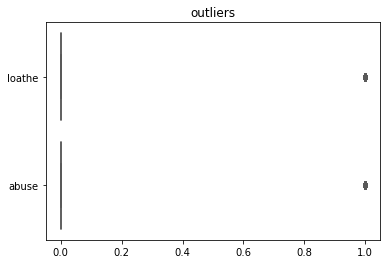

In [24]:
sns.boxplot(data=df[['loathe','abuse']],orient='h',palette='Set2')
plt.title('outliers')
plt.show()

In [34]:
target_data = df[cols_target]

df['bad'] =df[cols_target].sum(axis =1)
print(df['bad'].value_counts())
df['bad'] = df['bad'] > 0 
df['bad'] = df['bad'].astype(int)
print(df['bad'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: bad, dtype: int64
0    143346
1     16225
Name: bad, dtype: int64


In [35]:
#  Convert text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(df['comment_text'])
x = features

In [36]:
y=df['bad']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,test_size=.30)

In [37]:
#Import all model library
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV,cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [38]:
for i in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    lg.fit(x_train,y_train)
    pred_train=lg.predict(x_train)
    pred_test=lg.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print('At random_state:',i)
        print('Training r2_score is:',accuracy_score(y_train,pred_train)*100)
        print('Testing r2_score is:',accuracy_score(y_test,pred_test)*100)
    

At random_state: 65
Training r2_score is: 95.9416099867979
Testing r2_score is: 95.8614293234402
At random_state: 88
Training r2_score is: 95.88729758184462
Testing r2_score is: 95.86393602887725


In [39]:
pred_lg=lg.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_lg)
for j in range(2,10):
    lsscore=cross_val_score(lg,x,y,cv=j)
    lsc=lsscore.mean()
    print('At cv:',j)
    print('Cross vali score is:',lss*100)
    print('Accuracy is:',lss*100)
    print('\n')

At cv: 2
Cross vali score is: 95.736094051588
Accuracy is: 95.736094051588


At cv: 3
Cross vali score is: 95.736094051588
Accuracy is: 95.736094051588


At cv: 4
Cross vali score is: 95.736094051588
Accuracy is: 95.736094051588


At cv: 5
Cross vali score is: 95.736094051588
Accuracy is: 95.736094051588


At cv: 6
Cross vali score is: 95.736094051588
Accuracy is: 95.736094051588


At cv: 7
Cross vali score is: 95.736094051588
Accuracy is: 95.736094051588


At cv: 8
Cross vali score is: 95.736094051588
Accuracy is: 95.736094051588


At cv: 9
Cross vali score is: 95.736094051588
Accuracy is: 95.736094051588




In [40]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
dc.fit(x_train,y_train)
dc.score(x_train,y_train)
pred=dc.predict(x_test)
print(accuracy_score(y_test,pred)*100)    
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

93.98892036196827
[[34711  1176]
 [ 1222  2784]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     35887
           1       0.70      0.69      0.70      4006

    accuracy                           0.94     39893
   macro avg       0.83      0.83      0.83     39893
weighted avg       0.94      0.94      0.94     39893



In [41]:
from sklearn.ensemble import RandomForestClassifier
rc=RandomForestClassifier()
rc.fit(x_train,y_train)
rc.score(x_train,y_train)
pred=rc.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

95.69849347003235
[[35422   465]
 [ 1251  2755]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     35887
           1       0.86      0.69      0.76      4006

    accuracy                           0.96     39893
   macro avg       0.91      0.84      0.87     39893
weighted avg       0.95      0.96      0.95     39893



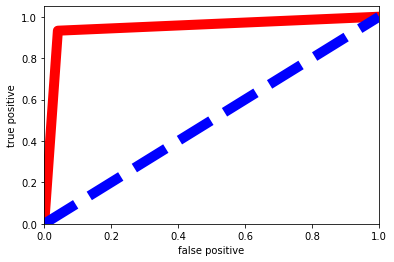

In [42]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='red',lw=10,label='Roc curve(area=%0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='blue',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('false positive')
plt.ylabel('true positive')
plt.show()

From above we can say that logistic regression gives 95.73% accuracy. Decision tree and random forest also has good accuracy more than 94%. So logistic regression method works better for our model. So we have apply same method for our testing dataset.

# Model Saving

We have to save our model using pickle method or joblib method.

In [43]:
import pickle
filename='malignant.pkl'
pickle.dump(lg,open(filename,'wb'))

# Using the Test dataset

Now we are using our test dataset.

1. First we have to load the csv data using pandas library.
2. Then we have to do some data preprocessing.
3. Predict our model using the linear regression which gives higher accuracy.

In [44]:
#Loading the test data
test_df=pd.read_csv('test.csv')
test_df

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [45]:
#Preprocessing pipeline
pd.options.display.max_info_columns = 2
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [46]:
test_df.drop(columns=['id'],inplace=True)

In [47]:
test_df =tf_vec.fit_transform(test_df['comment_text'])
test_df

<153164x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 2940213 stored elements in Compressed Sparse Row format>

In [48]:
prediction=lg.predict(test_df)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
pickle.load(open('malignant.pkl','rb'))

# Conclusion

1.In the experimentation phase two different machine learning algorithms were employed for the proposed model development and their performances were evaluated on various parameters.

2.From all above process we can say that whatever algorithms or method we used for prediction of our model all process with visualization is very beneficial. Using any visualization library it is easy for us to understand the all data.

3.For this data Logistic regression proves the best and others we have used also has good result but while using Logistic regression with different random state, it also gives the more than 95% accuracy.